In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import matplotlib.font_manager as fm

In [4]:
global_games_market_columns = ['Platform','매출액']
global_games_market_index = [2022,2023,2022,2023,2022,2023,2022,2023]
global_games_market_values = [['MOBILE', 105.7],
                              ['MOBILE', 90.4],
                                   ['PC', 36.5],
                                   ['PC', 38.4],
                                   ['콘솔', 52.5],
                                   ['콘솔', 53.2],
                                   ['Browser PC', 2.3],
                                   ['Browser PC', 1.9]]
global_games_market = pd.DataFrame(global_games_market_values,columns = global_games_market_columns,index = global_games_market_index)
global_games_market['전년대비_매출변화'] = round(global_games_market['매출액'].pct_change() * 100,2)
global_games_market['Platform(전년대비_매출변화)'] = {}
for i in range(len(global_games_market)):
          global_games_market['Platform(전년대비_매출변화)'].iloc[i] = f'{global_games_market["Platform"].iloc[i]}\n({global_games_market["전년대비_매출변화"].iloc[i]}%)'
global_games_market

C:\Users\user\AppData\Local\Temp\ipykernel_17136\911533184.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_games_market['Platform(전년대비_매출변화)'].iloc[i] = f'{global_games_market["Platform"].iloc[i]}\n({global_games_market["전년대비_매출변화"].iloc[i]}%)'
C:\Users\user\AppData\Local\Temp\ipykernel_17136\911533184.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_games_market['Platform(전년대비_매출변화)'].iloc[i] = f'{global_games_market["Platform"].iloc[i]}\n({global_games_market["전년대비_매출변화"].iloc[i]}%)'
C:\Users\user\AppData\Local\Temp\ipykernel_17136\911533184.py:15: SettingWithCopyWarning: 
A value is trying to 

,Platform,매출액,전년대비_매출변화,Platform(전년대비_매출변화)
2022,MOBILE,105.7,NaN,MOBILE\n(nan%)
2023,MOBILE,90.4,-14.47,MOBILE\n(-14.47%)
2022,PC,36.5,-59.62,PC\n(-59.62%)
2023,PC,38.4,5.21,PC\n(5.21%)
2022,콘솔,52.5,36.72,콘솔\n(36.72%)
2023,콘솔,53.2,1.33,콘솔\n(1.33%)
2022,Browser PC,2.3,-95.68,Browser PC\n(-95.68%)
2023,Browser PC,1.9,-17.39,Browser PC\n(-17.39%)


Text(-0.25, -0.1, '    2023\n총 $184.0bn')

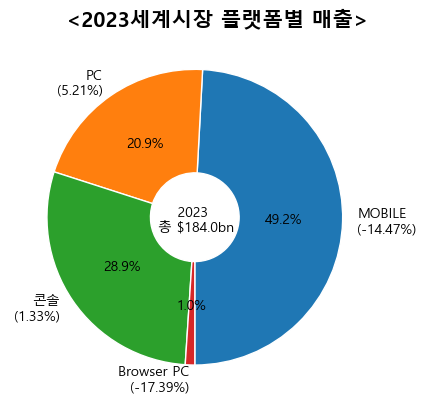

In [42]:
wedgeprops={'width': 0.7, 'edgecolor': 'w'}
plt.title('      <2023세계시장 플랫폼별 매출>', fontdict={'size':15, 'weight':'bold'}, pad = 5.0)
plt.pie(global_games_market.loc[2023,'매출액'], autopct='%.1f%%', wedgeprops=wedgeprops, labels=global_games_market.loc[2023,"Platform(전년대비_매출변화)"], startangle=270)
plt.text(x = -0.25, y = -0.1, s = '    2023\n총 $184.0bn')

In [6]:
game_sales_path = "C:/Users/UserK/Downloads/archive (3)/Games_Sales.csv"
game_sales = pd.read_csv(game_sales_path)
game_sales.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/UserK/Downloads/archive (3)/Games_Sales.csv'

In [ ]:
#game_sales.drop(['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Rating', 'Developer'], axis = 1, inplace = True)
#분석에 사용되지 않는 열 제거
game_sales.dropna(how = 'any', axis = 0, inplace = True)
#결측치가 포함된 행 제거
game_sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [ ]:
print(f'가장 오래된 게임 : {game_sales.sort_values(by=["Year_of_Release"]).iloc[0,2]}')
print(f'가장 최신 게임 : {game_sales.sort_values(by=["Year_of_Release"], ascending = False).iloc[0,2]}')
#1980~1999 / 2000~2009 / 2010~2020 로 분류해보자.

가장 오래된 게임 : 1985.0
가장 최신 게임 : 2016.0


In [ ]:
game_sales1999 = game_sales[game_sales['Year_of_Release'] <= 1999]
game_sales2009 = game_sales[(2009 >= game_sales['Year_of_Release']) & (game_sales['Year_of_Release'] > 1999)]
game_sales2020 = game_sales[game_sales['Year_of_Release'] >= 2010]

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

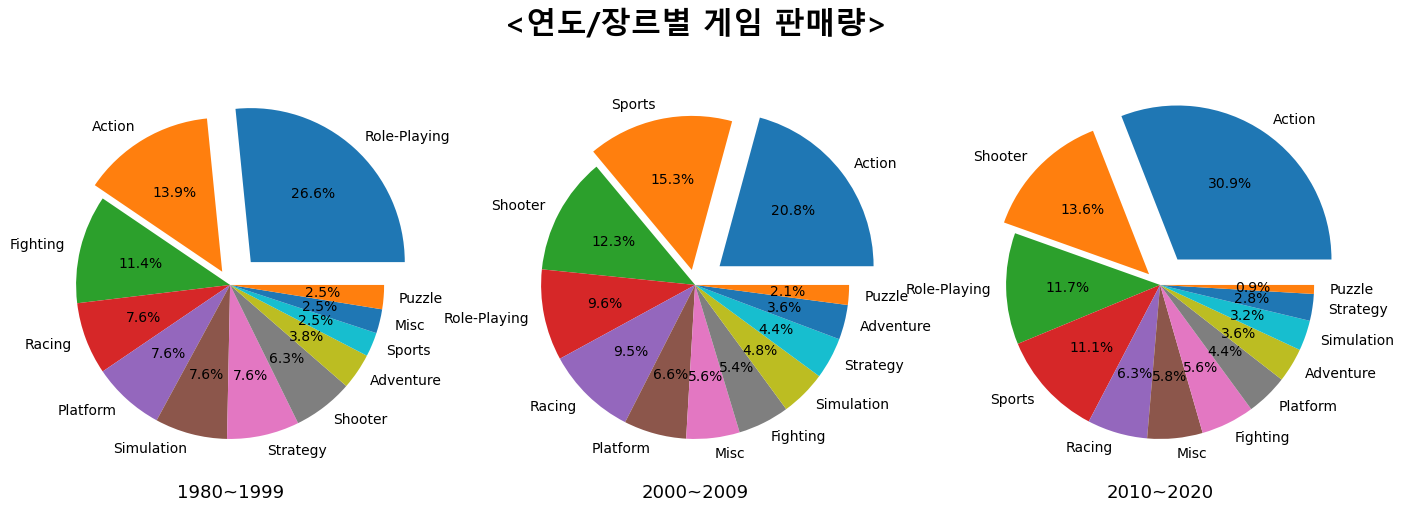

In [ ]:
#font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
#font_list
#한글깨짐해결 print ('설정파일 위치: ', mpl.matplotlib_fname()) / mpl.get_cachedir ()
g_pie = gs.GridSpec(1, 3)
fig = plt.figure(figsize=(17, 5))
font = {'family' : 'Malgun Gothic',
        'weight' : 'bold',
        'size'   : 22}
fig.text(x = 0.4, y = 1, s = '<연도/장르별 게임 판매량>', fontdict=font)
ax1 = fig.add_subplot(g_pie[0, 0])
ax2 = fig.add_subplot(g_pie[0, 1])
ax3 = fig.add_subplot(g_pie[0, 2])
ax1.pie(x = game_sales1999.Genre.value_counts().values, labels = game_sales1999.Genre.value_counts().index, autopct='%1.1f%%', explode=(0.2,0.1,0,0,0,0,0,0,0,0,0,0))
ax1.set_xlabel('1980~1999', fontdict = {'size' : 13})
ax2.pie(x = game_sales2009.Genre.value_counts().values, labels = game_sales2009.Genre.value_counts().index, autopct='%1.1f%%', explode=(0.2,0.1,0,0,0,0,0,0,0,0,0,0))
ax2.set_xlabel('2000~2009', fontdict = {'size' : 13})
ax3.pie(x = game_sales2020.Genre.value_counts().values, labels = game_sales2020.Genre.value_counts().index, autopct='%1.1f%%', explode=(0.2,0.1,0,0,0,0,0,0,0,0,0,0))
ax3.set_xlabel('2010~2020', fontdict = {'size' : 13})
plt.show()

C:\Users\UserK\AppData\Local\Temp\ipykernel_12848\1599461704.py:15: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax_heat1.get_shared_y_axes().join(ax_heat2,ax_heat3)


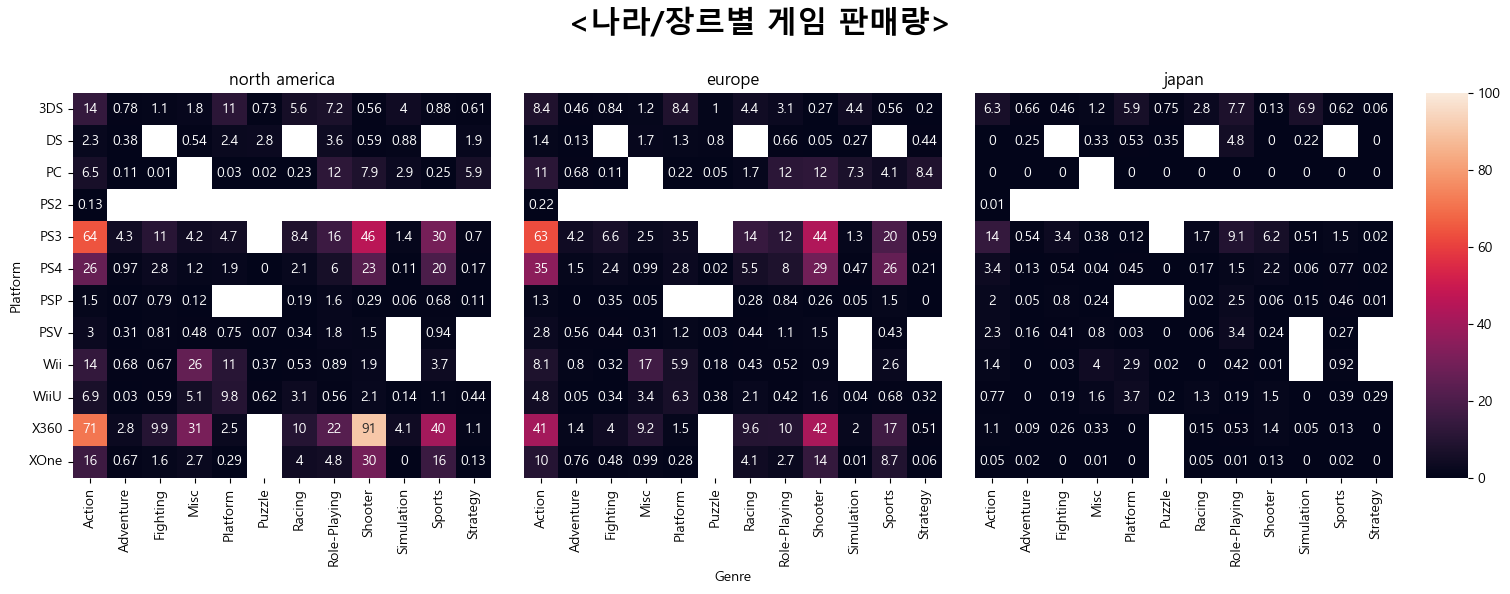

In [ ]:
g_heat = gs.GridSpec(1, 4, width_ratios=[1,1,1,0.1], wspace=0.1)
#color bar는 상대적으로 작아도 되기 때문에 비율을 0.1로 설정.

fig_heat = plt.figure(figsize=(18, 5))
font = {'family' : 'Malgun Gothic',
        'weight' : 'bold',
        'size'   : 22}
fig_heat.text(x = 0.4, y = 1, s = '<나라/장르별 게임 판매량>', fontdict=font)
ax_heat1 = fig_heat.add_subplot(g_heat[0, 0])
ax_heat2 = fig_heat.add_subplot(g_heat[0, 1])
ax_heat3 = fig_heat.add_subplot(g_heat[0, 2])
axcb = fig_heat.add_subplot(g_heat[0, 3])
#color bar를 위치시킬 공간을 따로 설정.

ax_heat1.get_shared_y_axes().join(ax_heat2,ax_heat3)
game_sales2020_na = game_sales2020.pivot_table(index = 'Platform', columns = 'Genre', values = 'NA_Sales', aggfunc = sum)
game_sales2020_eu = game_sales2020.pivot_table(index = 'Platform', columns = 'Genre', values = 'EU_Sales', aggfunc = sum)
game_sales2020_jp = game_sales2020.pivot_table(index = 'Platform', columns = 'Genre', values = 'JP_Sales', aggfunc = sum)
game_sales2020_all = game_sales2020.pivot_table(index = 'Platform', columns = 'Genre', values = 'JP_Sales', aggfunc = sum)
#pivot_table이 아닌 pivot에선 aggfunc를 사용할 수 없다.

ax_heat1 = sns.heatmap(game_sales2020_na, annot = True, ax = ax_heat1, cbar = False, vmax = 100)
ax_heat1.set_title('north america')
ax_heat1.set_xlabel('')
ax_heat2 = sns.heatmap(game_sales2020_eu, annot = True, ax = ax_heat2, cbar = False, vmax = 100)
ax_heat2.set_title('europe')
ax_heat2.set_yticks([])
ax_heat2.set_ylabel('')
ax_heat3 = sns.heatmap(game_sales2020_jp, annot = True, ax = ax_heat3, cbar_ax = axcb, vmax = 100)
ax_heat3.set_title('japan')
ax_heat3.set_yticks([])
ax_heat3.set_ylabel('')
ax_heat3.set_xlabel('')
#세 개의 heatmap을 동일한 color bar로 나타내야 하기때문에 최대값을 동일하게 설정.
 
plt.show()

In [ ]:
#한국콘텐츠진흥원 게임이용자 실태 조사
game_user_index = ['전체','남성','여성']
game_user_value = [[40.3,46.8,64.6,45.9,42.9,25.7,13.7],
                   [49.7,60.2,77.3,56.3,52.5,30.1,19.6],
                   [30.6,33.0,51.1,35.2,33.2,21.2,7.9]]
game_user_columns = ['전체', '10대', '20대', '30대', '40대', '50대', '60~65세']
game_user = pd.DataFrame(game_user_value,index = game_user_index,columns=game_user_columns)
game_user
#그래프 그리기 용이하게 아래의 데이터프레임으로 변경.

,전체,10대,20대,30대,40대,50대,60~65세
전체,40.3,46.8,64.6,45.9,42.9,25.7,13.7
남성,49.7,60.2,77.3,56.3,52.5,30.1,19.6
여성,30.6,33.0,51.1,35.2,33.2,21.2,7.9


In [ ]:
game_user_columns1 = ['연령대', '성별','게임이용비율']
game_user_value1 = [['전연령','전체',40.3],
                    ['전연령','남성',49.7],
                    ['전연령','여성',30.6],
                    ['10대','전체',46.8],
                    ['10대','남성',60.2],
                    ['10대','여성',33.0],
                    ['20대','전체',64.6],
                    ['20대','남성',77.3],
                    ['20대','여성',51.1],
                    ['30대','전체',45.9],
                    ['30대','남성',56.3],
                    ['30대','여성',35.2],
                    ['40대','전체',42.9],
                    ['40대','남성',52.5],
                    ['40대','여성',33.2],
                    ['50대','전체',25.7],
                    ['50대','남성',30.1],
                    ['50대','여성',21.2],
                    ['60~65세','전체',13.7],
                    ['60~65세','남성',19.6],
                    ['60~65세','여성',7.9]]
game_user1 = pd.DataFrame(game_user_value1,columns=game_user_columns1)
game_user1

,연령대,성별,게임이용비율
0,전연령,전체,40.3
1,전연령,남성,49.7
2,전연령,여성,30.6
3,10대,전체,46.8
4,10대,남성,60.2
5,10대,여성,33.0
6,20대,전체,64.6
7,20대,남성,77.3
8,20대,여성,51.1
9,30대,전체,45.9


<Axes: title={'center': 'PC 게임 이용률'}, xlabel='연령대', ylabel='게임이용비율'>

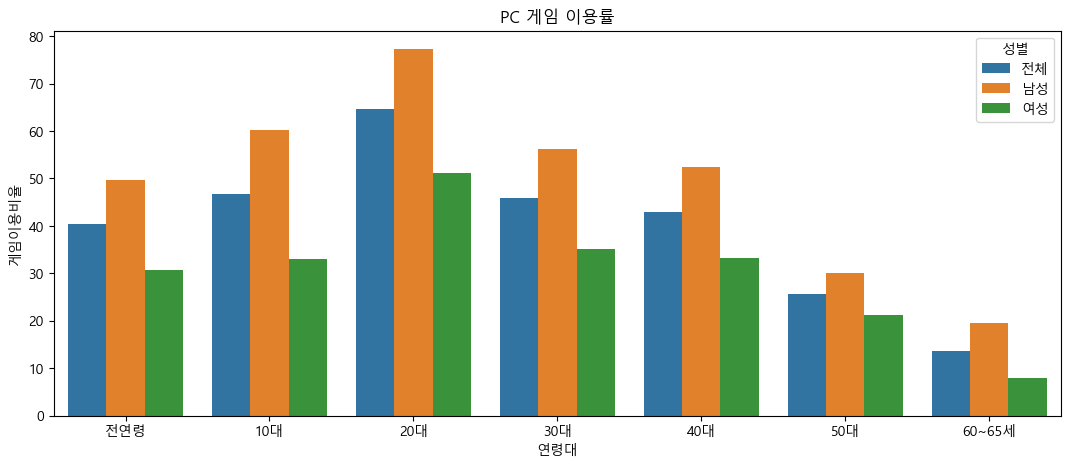

In [ ]:
plt.figure(figsize=(13, 5))
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title('PC 게임 이용률')
sns.barplot(x = game_user1['연령대'],y =game_user1['게임이용비율'], hue = game_user1['성별'], errwidth = 0)
#게임 이용 비율이 10~30대가 높다.

In [ ]:
game_genre_columns = ['장르','연령대','이용비율']
game_genre_value = [['롤플레잉(RPG)','전체',41.0],
                    ['롤플레잉(RPG)','10대',38.3],
                    ['롤플레잉(RPG)','20대',44.4],
                    ['롤플레잉(RPG)','30대',50.2],
                    ['롤플레잉(RPG)','40대',41.0],
                    ['롤플레잉(RPG)','50대',28.9],
                    ['롤플레잉(RPG)','60~64세',25.1],
                    ['슈팅(FPS)','전체',35.3],
                    ['슈팅(FPS)','10대',40.8],
                    ['슈팅(FPS)','20대',40.5],
                    ['슈팅(FPS)','30대',37.2],
                    ['슈팅(FPS)','40대',32.1],
                    ['슈팅(FPS)','50대',26.4],
                    ['슈팅(FPS)','60~64세',15.8],
                    ['스포츠','전체',27.0],
                    ['스포츠','10대',27.3],
                    ['스포츠','20대',23.5],
                    ['스포츠','30대',30.5],
                    ['스포츠','40대',24.4],
                    ['스포츠','50대',28.9],
                    ['스포츠','60~64세',37.0],
                    ['시뮬레이션','전체',24.3],
                    ['시뮬레이션','10대',10.1],
                    ['시뮬레이션','20대',24.1],
                    ['시뮬레이션','30대',32.6],
                    ['시뮬레이션','40대',26.4],
                    ['시뮬레이션','50대',24.9],
                    ['시뮬레이션','60~64세',30.7],
                    ['레이싱','전체',22.3],
                    ['레이싱','10대',26.3],
                    ['레이싱','20대',26.3],
                    ['레이싱','30대',19.2],
                    ['레이싱','40대',19.4],
                    ['레이싱','50대',19.5],
                    ['레이싱','60~64세',18.0],
                    ['퍼즐','전체',17.5],
                    ['퍼즐','10대',11.0],
                    ['퍼즐','20대',10.2],
                    ['퍼즐','30대',11.0],
                    ['퍼즐','40대',23.2],
                    ['퍼즐','50대',33.3],
                    ['퍼즐','60~64세',43.3],
                    ['AOS(MOBA)','전체',17.3],
                    ['AOS(MOBA)','10대',34.5],
                    ['AOS(MOBA)','20대',24.6],
                    ['AOS(MOBA)','30대',14.0],
                    ['AOS(MOBA)','40대',6.5],
                    ['AOS(MOBA)','50대',6.5],
                    ['AOS(MOBA)','60~64세',2.5],
                    ['액션','전체',17.2],
                    ['액션','10대',10.6],
                    ['액션','20대',15.2],
                    ['액션','30대',20.2],
                    ['액션','40대',22.9],
                    ['액션','50대',15.6],
                    ['액션','60~64세',19.5],
                    ['실시간전략게임(RTS)','전체',15.6],
                    ['실시간전략게임(RTS)','10대',7.7],
                    ['실시간전략게임(RTS)','20대',14.1],
                    ['실시간전략게임(RTS)','30대',20.9],
                    ['실시간전략게임(RTS)','40대',17.0],
                    ['실시간전략게임(RTS)','50대',21.0],
                    ['실시간전략게임(RTS)','60~64세',10.2],
                    ['배틀로얄','전체',15.4],
                    ['배틀로얄','10대',35.4],
                    ['배틀로얄','20대',16.6],
                    ['배틀로얄','30대',8.0],
                    ['배틀로얄','40대',11.5],
                    ['배틀로얄','50대',8.1],
                    ['배틀로얄','60~64세',3.6]
                    ]
game_genre = pd.DataFrame(game_genre_value, columns=game_genre_columns)
game_genre

,장르,연령대,이용비율
0,롤플레잉(RPG),전체,41.0
1,롤플레잉(RPG),10대,38.3
2,롤플레잉(RPG),20대,44.4
3,롤플레잉(RPG),30대,50.2
4,롤플레잉(RPG),40대,41.0
...,...,...,...
65,배틀로얄,20대,16.6
66,배틀로얄,30대,8.0
67,배틀로얄,40대,11.5
68,배틀로얄,50대,8.1


<Axes: title={'center': '주 이용 장르'}, xlabel='장르', ylabel='이용비율'>

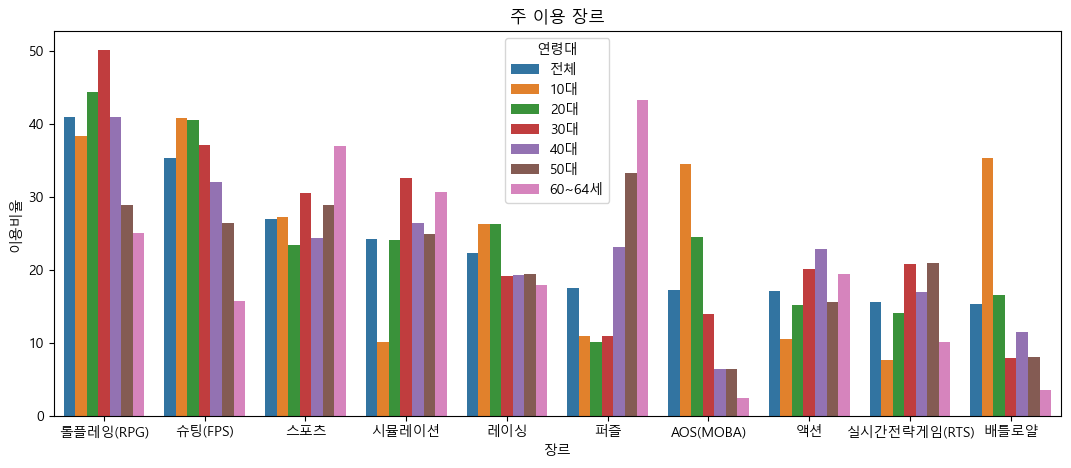

In [ ]:
plt.figure(figsize=(13, 5))
plt.title('주 이용 장르')
sns.barplot(x='장르', y='이용비율',data = game_genre,hue='연령대')
#비효과적인 시각화

([<matplotlib.patches.Wedge at 0x2928eaf7310>,
 [Text(1.021111768289749, 0.6303417776573133, '롤플레잉(RPG)'),
  Text(-0.012611912595245791, 1.099927697469561, '슈팅(FPS)'),
  Text(-0.8277367087001571, 0.7244666597368242, '스포츠'),
  Text(-1.0995997235919148, 0.029672341946408495, '시뮬레이션'),
  Text(-0.9068679249601517, -0.6225677205561407, '레이싱'),
  Text(-0.4608795359028172, -0.99879429983656, '퍼즐'),
  Text(0.04079474711794996, -1.0992432799920056, 'AOS(MOBA)'),
  Text(0.5297468058016928, -0.9640375105476465, '액션'),
  Text(0.8914858139284069, -0.6444013063025293, '실시간전략게임(RTS)'),
  Text(1.076351505624015, -0.22686435670002555, '배틀로얄')],
 [Text(0.5956485315023536, 0.36769937030009936, '17.6%'),
  Text(-0.00687922505195225, 0.5999605622561242, '15.2%'),
  Text(-0.45149275020008567, 0.3951636325837223, '11.6%'),
  Text(-0.5997816674137717, 0.016184913788950085, '10.4%'),
  Text(-0.4946552317964463, -0.33958239303062215, '9.6%'),
  Text(-0.251388837765173, -0.5447968908199418, '7.5%'),
  Text(0.022

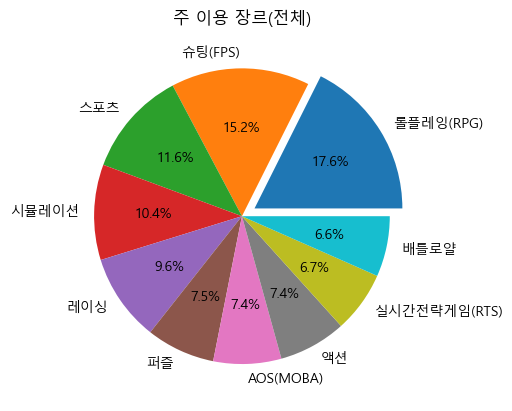

In [ ]:
plt.title('주 이용 장르(전체)')
plt.pie(game_genre.이용비율[game_genre['연령대']=='전체'], labels = game_genre.장르[game_genre['연령대']=='전체'],explode=(0.1,0,0,0,0,0,0,0,0,0),autopct='%1.1f%%')
#전연령대의 데이터만 추출해 파이그래프 생성.

(0.0, 100.0)

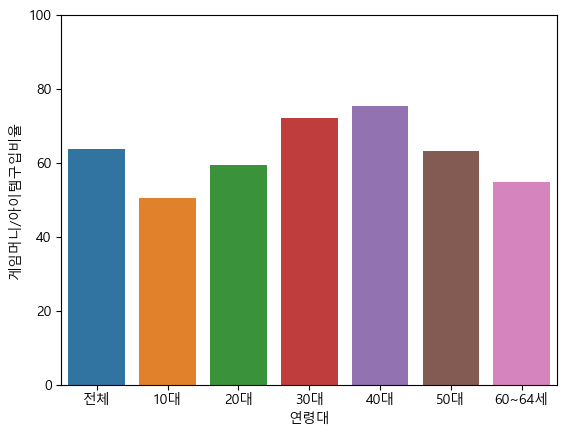

In [ ]:
purchasing_rate_values = [['전체',63.8],['10대',50.5],['20대',59.5],['30대',72.0],['40대',75.3],['50대',63.1],['60~64세',54.9]]
purchasing_rate_columns = ['연령대', '게임머니/아이템구입비율']
purchasing_rate = pd.DataFrame(purchasing_rate_values,columns=purchasing_rate_columns)
sns.barplot(x = purchasing_rate['연령대'],y=purchasing_rate['게임머니/아이템구입비율'])
plt.ylim(top = 100)

(0.0, 40.0)

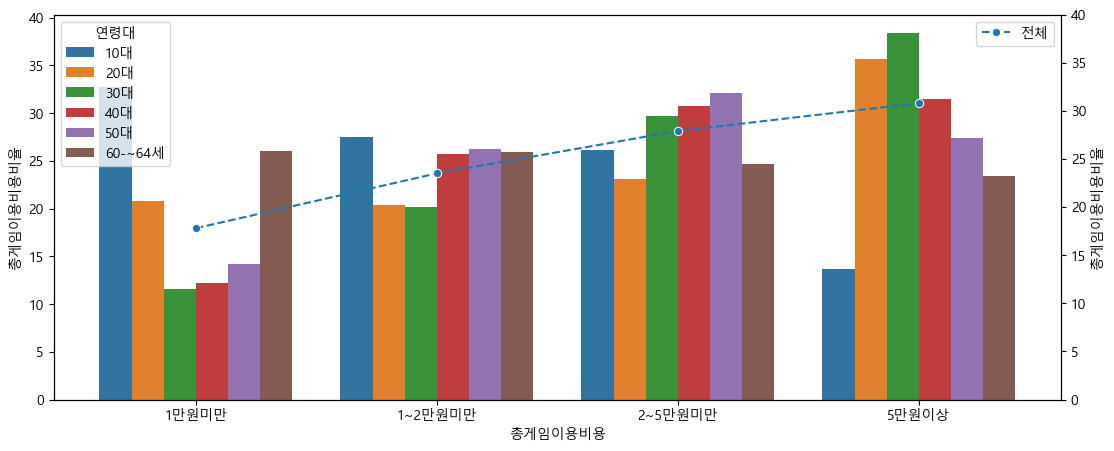

In [ ]:
game_payment_value = [['전체','1만원미만',17.8],['전체','1~2만원미만',23.5],['전체','2~5만원미만',27.9],['전체','5만원이상',30.8],
                      ['10대','1만원미만',32.7],['10대','1~2만원미만',27.5],['10대','2~5만원미만',26.1],['10대','5만원이상',13.7],
                      ['20대','1만원미만',20.8],['20대','1~2만원미만',20.4],['20대','2~5만원미만',23.1],['20대','5만원이상',35.7],
                      ['30대','1만원미만',11.6],['30대','1~2만원미만',20.2],['30대','2~5만원미만',29.7],['30대','5만원이상',38.4],
                      ['40대','1만원미만',12.2],['40대','1~2만원미만',25.7],['40대','2~5만원미만',30.7],['40대','5만원이상',31.5],
                      ['50대','1만원미만',14.2],['50대','1~2만원미만',26.2],['50대','2~5만원미만',32.1],['50대','5만원이상',27.4],
                      ['60-~64세','1만원미만',26.0],['60-~64세','1~2만원미만',25.9],['60-~64세','2~5만원미만',24.7],['60-~64세','5만원이상',23.4],]
game_payment_columns = ['연령대','총게임이용비용','총게임이용비용비율']
game_payment = pd.DataFrame(game_payment_value,columns=game_payment_columns)
fig = plt.figure(figsize=(13, 5))
g_p = fig.add_subplot()
g_p = sns.barplot(x = game_payment.총게임이용비용[~(game_payment['연령대']=='전체')], hue = game_payment.연령대[~(game_payment['연령대']=='전체')],y = game_payment.총게임이용비용비율[~(game_payment['연령대']=='전체')])
g_p1 = g_p.twinx()
g_p1 = sns.lineplot(x = game_payment.총게임이용비용[game_payment['연령대']=='전체'], y = game_payment.총게임이용비용비율[game_payment['연령대']=='전체']
                    ,linestyle='--',marker='o',legend='auto')
plt.legend(['전체'],loc = 1)
g_p1.set_ylim(0,40)

<Axes: xlabel='변수', ylabel='평균'>

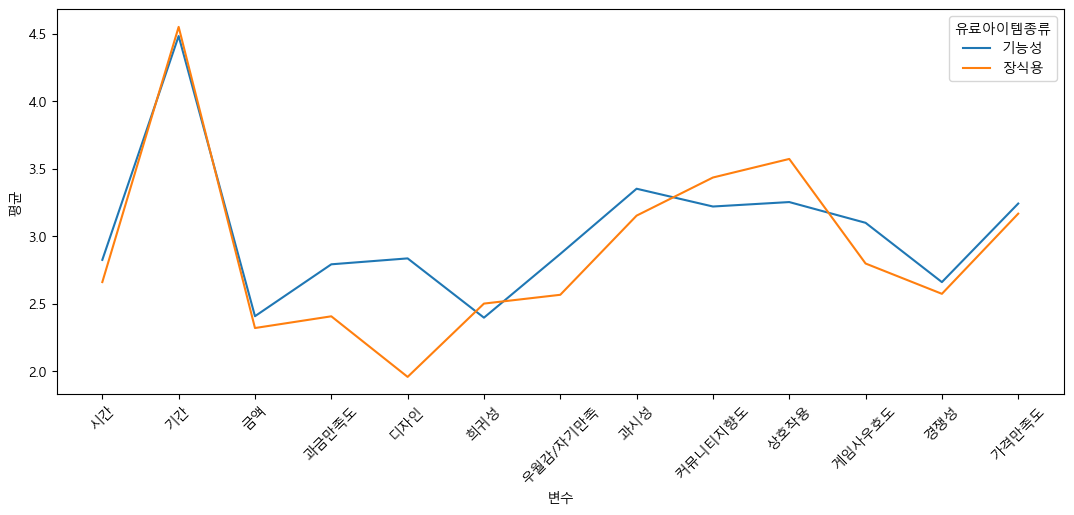

In [ ]:
reason_for_purchase_columns = ['변수','유료아이템종류','평균']
reason_for_purchase_values = [['시간','기능성',2.8241],['시간','장식용',2.6594],
                              ['기간','기능성',4.4835],['기간','장식용',4.5514],
                              ['금액','기능성',2.4065],['금액','장식용',2.3188],
                              ['과금만족도','기능성',2.7912],['과금만족도','장식용',2.4057],
                              ['디자인','기능성',2.8351],['디자인','장식용',1.9565],
                              ['희귀성','기능성',2.3956],['희귀성','장식용',2.5],
                              ['우월감/자기만족','기능성',2.8681],['우월감/자기만족','장식용',2.5652],
                              ['과시성','기능성',3.3516],['과시성','장식용',3.1521],
                              ['커뮤니티지향도','기능성',3.2197],['커뮤니티지향도','장식용',3.4347],
                              ['상호작용','기능성',3.2527],['상호작용','장식용',3.5724],
                              ['게임사우호도','기능성',3.0989],['게임사우호도','장식용',2.7971],
                              ['경쟁성','기능성',2.6593],['경쟁성','장식용',2.5724],
                              ['가격만족도','기능성',3.2417],['가격만족도','장식용',3.1667]]
reason_for_purchase = pd.DataFrame(reason_for_purchase_values,columns=reason_for_purchase_columns)
plt.figure(figsize=(13, 5))
plt.xticks(rotation=45)
sns.lineplot(x = reason_for_purchase['변수'], y = reason_for_purchase['평균'], hue = reason_for_purchase['유료아이템종류'])

In [ ]:
market_size_columns = ['모바일', 'PC', '콘솔', '아케이드']
market_size_index = ['북미', '유럽', '남미', '아시아']
market_size_values = [[35.5, 12.2, 40.5, 11.8],
                      [31.8, 10.7, 37.7, 19.8],
                      [52.7, 16.1, 16.3, 14.8],
                      [59.6, 23.5, 9.1, 7.8]]
market_size = pd.DataFrame(market_size_values, index = market_size_index, columns = market_size_columns)
market_size

,모바일,PC,콘솔,아케이드
북미,35.5,12.2,40.5,11.8
유럽,31.8,10.7,37.7,19.8
남미,52.7,16.1,16.3,14.8
아시아,59.6,23.5,9.1,7.8


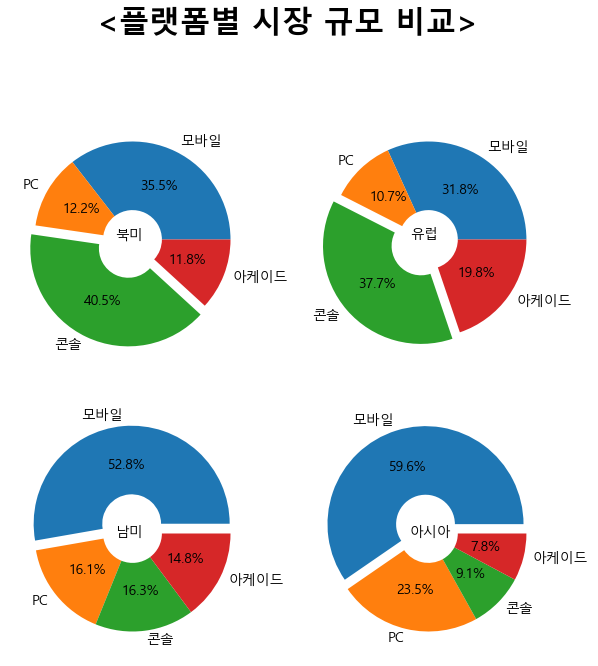

In [ ]:
#g_pie = gs.GridSpec(2, 2)
g_pie = gs.GridSpec(2, 2)
fig = plt.figure(figsize=(7, 7))
font = {'family' : 'Malgun Gothic',
        'weight' : 'bold',
        'size'   : 22}
fig.text(x = 0.25, y = 1, s = '<플랫폼별 시장 규모 비교>', fontdict=font)
ax1 = fig.add_subplot(g_pie[0, 0])
ax2 = fig.add_subplot(g_pie[0, 1])
ax3 = fig.add_subplot(g_pie[1, 0])
ax4 = fig.add_subplot(g_pie[1, 1])
ax1.pie(x = market_size.loc['북미',:], autopct='%.1f%%', wedgeprops={'width': 0.7}, labels = market_size_columns, explode=(0,0,0.1,0))
plt.text(x = -3.2, y = 3, s = '북미')
ax2.pie(x = market_size.loc['유럽',:], autopct='%.1f%%', wedgeprops={'width': 0.7}, labels = market_size_columns, explode=(0,0,0.1,0))
plt.text(x = -0.19, y = 3, s = '유럽')
ax3.pie(x = market_size.loc['남미',:], autopct='%.1f%%', wedgeprops={'width': 0.7}, labels = market_size_columns, explode=(0.1,0,0,0))
plt.text(x = -3.2, y = -0.03, s = '남미')
ax4.pie(x = market_size.loc['아시아',:], autopct='%.1f%%', wedgeprops={'width': 0.7}, labels = market_size_columns, explode=(0.1,0,0,0))
plt.text(x = -0.19, y = -0.03, s = '아시아')
#ax3.pie(x = game_sales2020.Genre.value_counts().values, labels = game_sales2020.Genre.value_counts().index, autopct='%1.1f%%', explode=(0.2,0.1,0,0,0,0,0,0,0,0,0,0))
#ax3.set_xlabel('2010~2020', fontdict = {'size' : 13})
plt.show()

In [ ]:
pc_market_size_by_country_columns =  ['2019년', '2020년', '2021년', '2022년', '2023년', '2024년']
pc_market_size_by_country_index = [['북미','북미', '유럽','유럽', '아시아','아시아', '남미','남미', '합계','합계'],
                                   ['매출액', '성장률', '매출액', '성장률', '매출액', '성장률', '매출액', '성장률', '매출액', '성장률']]
pc_market_size_by_country_values = [[5271, 5911, 6469, 6924, 7413, 7923],
                                    [],
                                    [6130, 6494, 6817, 7029, 7295, 7579],
                                    [],
                                    [19815, 20621, 23437, 24643, 26562, 29052],
                                    [],
                                    [480, 497, 519, 533, 552, 574],
                                    [],
                                    [],
                                    []]
pc_market_size_by_country = pd.DataFrame(pc_market_size_by_country_values, index = pc_market_size_by_country_index, columns = pc_market_size_by_country_columns)
pc_market_size_by_country
#fig.text(x = 0.4, y = 1, s = '<PC게임 시장 규모 및 성장률>', fontdict=font)

2019년    2020년    2021년    2022년    2023년    2024년
북미  매출액   5271.0   5911.0   6469.0   6924.0   7413.0   7923.0
    성장률      NaN      NaN      NaN      NaN      NaN      NaN
유럽  매출액   6130.0   6494.0   6817.0   7029.0   7295.0   7579.0
    성장률      NaN      NaN      NaN      NaN      NaN      NaN
아시아 매출액  19815.0  20621.0  23437.0  24643.0  26562.0  29052.0
    성장률      NaN      NaN      NaN      NaN      NaN      NaN
남미  매출액    480.0    497.0    519.0    533.0    552.0    574.0
    성장률      NaN      NaN      NaN      NaN      NaN      NaN
합계  매출액      NaN      NaN      NaN      NaN      NaN      NaN
    성장률      NaN      NaN      NaN      NaN      NaN      NaN

In [ ]:
mobile_market_size_by_country_columns =  ['2019년', '2020년', '2021년', '2022년', '2023년', '2024년']
mobile_market_size_by_country_index = [['북미','북미', '유럽','유럽', '아시아','아시아', '남미','남미', '합계','합계'],
                                   ['매출액', '성장률', '매출액', '성장률', '매출액', '성장률', '매출액', '성장률', '매출액', '성장률']]
mobile_market_size_by_country_values = [[13696, 17430, 18785, 20063, 21390, 22525],
                                    [],
                                    [14577, 18024, 20350, 22410, 24386, 26188],
                                    [],
                                    [45058, 53391, 59402, 62948, 68415, 74222],
                                    [],
                                    [1155, 1350, 1697, 1948, 2228, 2456],
                                    [],
                                    [],
                                    []]
mobile_market_size_by_country = pd.DataFrame(mobile_market_size_by_country_values, index = mobile_market_size_by_country_index, columns = mobile_market_size_by_country_columns)
mobile_market_size_by_country

#fig.text(x = 0.4, y = 1, s = '<모바일 게임 시장 규모 및 성장률>', fontdict=font)

2019년    2020년    2021년    2022년    2023년    2024년
북미  매출액  13696.0  17430.0  18785.0  20063.0  21390.0  22525.0
    성장률      NaN      NaN      NaN      NaN      NaN      NaN
유럽  매출액  14577.0  18024.0  20350.0  22410.0  24386.0  26188.0
    성장률      NaN      NaN      NaN      NaN      NaN      NaN
아시아 매출액  45058.0  53391.0  59402.0  62948.0  68415.0  74222.0
    성장률      NaN      NaN      NaN      NaN      NaN      NaN
남미  매출액   1155.0   1350.0   1697.0   1948.0   2228.0   2456.0
    성장률      NaN      NaN      NaN      NaN      NaN      NaN
합계  매출액      NaN      NaN      NaN      NaN      NaN      NaN
    성장률      NaN      NaN      NaN      NaN      NaN      NaN

In [ ]:
mobile_market_size_by_country.loc['성장률',:]
#loc을 멀티인덱스 데이터프레임에서 쓰려면 가장 큰 분류인 권역별에서만 사용가능. ex) 유럽, 남미...

KeyError: '성장률'

In [ ]:
mobile_market_size_by_country.xs('성장률', level=1)

,2019년,2020년,2021년,2022년,2023년,2024년
북미,NaN,NaN,NaN,NaN,NaN,NaN
유럽,NaN,NaN,NaN,NaN,NaN,NaN
아시아,NaN,NaN,NaN,NaN,NaN,NaN
남미,NaN,NaN,NaN,NaN,NaN,NaN
합계,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
market_size_by_country_index = [['북미', '북미', '북미', '유럽', '유럽', '유럽', '유럽', '유럽', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아','남미'],
                                ['전체', '미국', '캐나다', '전체', '영국', '독일', '프랑스', '이탈리아', '전체', '일본', '중국', '한국', '대만', '기타','전체']]
market_size_by_country_columns = ['콘솔', '아케이드', 'PC', '모바일', '합계']
market_size_by_country_values = [[21394, 6221, 6469, 18785, 52869],
                                 [19729, 5646, 6141, 16914, 48431],
                                 [1664, 575, 329, 1870, 4438],
                                 [24149, 12685, 6817, 20350, 64001],
                                 [6155, 2533, 1634, 3208, 13530],
                                 [2739, 2159, 811, 4413, 10121],
                                 [4355, 1709, 1363, 1814, 9242],
                                 [2146, 1116, 254, 2126, 5642],
                                 [9071, 7760, 23437, 59402, 99669],
                                 [5196, 5269, 369, 11839, 22672],
                                 [678, 277, 15631, 28233, 44820],
                                 [919, 273, 4926, 10615, 16734],
                                 [281, 263, 839, 1586, 2970],
                                 [1996, 1676, 1672, 7129, 12474],
                                 [526, 476, 519, 1697, 3218]
                                 ]
market_size_by_country = pd.DataFrame(market_size_by_country_values, index=market_size_by_country_index,columns=market_size_by_country_columns)
market_size_by_country

콘솔   아케이드     PC    모바일     합계
북미  전체    21394   6221   6469  18785  52869
    미국    19729   5646   6141  16914  48431
    캐나다    1664    575    329   1870   4438
유럽  전체    24149  12685   6817  20350  64001
    영국     6155   2533   1634   3208  13530
    독일     2739   2159    811   4413  10121
    프랑스    4355   1709   1363   1814   9242
    이탈리아   2146   1116    254   2126   5642
아시아 전체     9071   7760  23437  59402  99669
    일본     5196   5269    369  11839  22672
    중국      678    277  15631  28233  44820
    한국      919    273   4926  10615  16734
    대만      281    263    839   1586   2970
    기타     1996   1676   1672   7129  12474
남미  전체      526    476    519   1697   3218

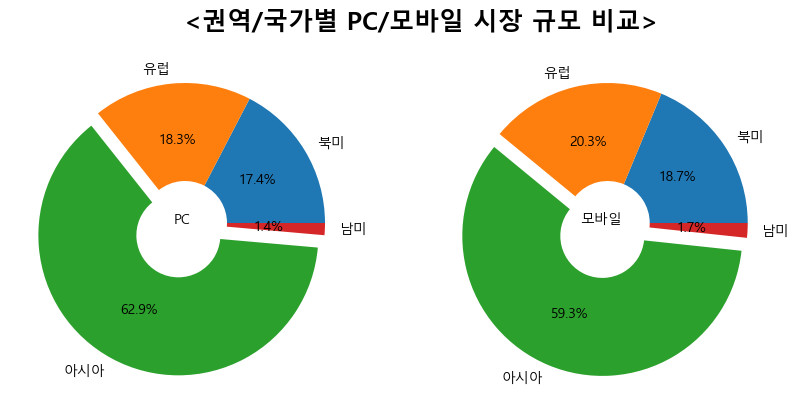

In [41]:
font = {'family' : 'Malgun Gothic',
        'weight' : 'bold',
        'size'   : 18}
g_market = gs.GridSpec(2, 2)
fig_market = plt.figure(figsize=(10,10))
fig_market.text(x = 0.3, y = 0.9, s = '<권역/국가별 PC/모바일 시장 규모 비교>', fontdict=font)
ax1 = fig_market.add_subplot(g_market[0, 0])
ax2 = fig_market.add_subplot(g_market[0, 1])
ax1.pie(x = market_size_by_country.xs('전체', level=1).loc[:,'PC'], autopct='%.1f%%', wedgeprops={'width': 0.7}, labels = market_size_by_country.xs('전체', level=1).loc[:,'PC'].index, explode=(0,0,0.1,0))
plt.text(x = -3.1, y = 0, s = 'PC')
ax2.pie(x = market_size_by_country.xs('전체', level=1).loc[:,'모바일'], autopct='%.1f%%', wedgeprops={'width': 0.7}, labels = market_size_by_country.xs('전체', level=1).loc[:,'모바일'].index,explode=(0,0,0.1,0))
plt.text(x = -0.2, y = 0, s = '모바일')
plt.show()

In [11]:
market_size_by_country.xs('전체', level=1).loc[:,'PC']

북미      6469
유럽      6817
아시아    23437
남미       519
Name: PC, dtype: int64

In [28]:
market_size_by_country.xs('전체', level=1).loc[:,'PC'].index

Index(['북미', '유럽', '아시아', '남미'], dtype='object')

In [33]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
font_list
print (f'설정파일 위치: {mpl.matplotlib_fname()} / {mpl.get_cachedir()}')

설정파일 위치: c:\ProgramData\anaconda3\Lib\site-packages\matplotlib\mpl-data\matplotlibrc / C:\Users\user\.matplotlib


In [34]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'